In [1]:
## Importing the necessary liabraries
import selenium
import pandas as pd
from selenium import webdriver
import time

In [115]:
driver=webdriver.Edge(r'C:\Users\Mandar Shinde\Desktop\DataScience\DATA TRAINED\FlipRobo Internship\msedgedriver.exe')

- **Q1. Write a python program which searches all the product under a particular product vertical from www.amazon.in. The product verticals to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.**

In [116]:
##Getting the Amazon.in home page
url='https://www.amazon.in/'
driver.get(url)

In [90]:
## accessing the search bar and entering 'Cricket Bats' in it
search_bar=driver.find_element_by_xpath('/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search_bar.send_keys('Cricket Bats')

In [91]:
## Clicking the search button
search_btn=driver.find_element_by_xpath('/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_btn.click()

- **Q2 In the above question, now scrape the following details of each product listed in first 3 pages  of your search results and save it in a data frame and csv.** In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. <br>
**Details to be scraped are:**
- "Brand Name", 
- "Name of the Product", 
- "Rating", 
- "No. of Ratings", 
- "Price", 
- "Return/Exchange", 
- "Expected Delivery", 
- "Availability", 
- "Other Details" 
- and “Product URL”. <br>
**In case, if any of the details are missing for any of the product then replace it by “-“.**

In [92]:
## Scraping urls for the pages where cricket bats are listed and saving them in a list
page_urls_tags=driver.find_elements_by_xpath('//span[@class="s-pagination-strip"]//a')

page_urls=[]
for i in page_urls_tags:
    page_urls.append(i.get_attribute('href'))
page_urls

[]

class="a-size-base-plus a-color-base a-text-normal" span

In [61]:
product_urls_tags=driver.find_elements_by_xpath('//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-4"]//a')

product_urls=[]
for i in page_urls[:3]:
    for j in product_urls_tags:
        product_urls.append(j.get_attribute('href'))
product_urls

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_next_aps_sr_pg2_1?ie=UTF8&adId=A08360662ENUI23J6MD1K&url=%2FStrauss-Cricket-Popular-Willow-Stumps%2Fdp%2FB097YN2LMG%2Fref%3Dsr_1_49_sspa%3Fdchild%3D1%26keywords%3DCricket%2BBats%26qid%3D1629389636%26sr%3D8-49-spons%26psc%3D1&qualifier=1629389636&id=4689689753208979&widgetName=sp_atf_next',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_next_aps_sr_pg2_1?ie=UTF8&adId=A03630271SALHNRKQIAQ0&url=%2FJaspo-T-20-Cricket-Size-5-Green%2Fdp%2FB07KN4WKHJ%2Fref%3Dsr_1_50_sspa%3Fdchild%3D1%26keywords%3DCricket%2BBats%26qid%3D1629389636%26sr%3D8-50-spons%26psc%3D1&qualifier=1629389636&id=4689689753208979&widgetName=sp_atf_next',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_next_aps_sr_pg2_1?ie=UTF8&adId=A01083532N7015FRZ1ZA5&url=%2FToyshine-Popular-Willow-Tennis-Cricket%2Fdp%2FB08LPYNQHT%2Fref%3Dsr_1_51_sspa%3Fdchild%3D1%26keywords%3DCricket%2BBats%26qid%3D1629389636%26sr%3D

In [62]:
len(product_urls)

156

In [71]:
names=[]

for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        name=driver.find_element_by_xpath('//h1[@class="a-size-large a-spacing-none"]')
        names.append(name.text)
    except:
        names.append('---')
names

['Strauss Popular Willow Cricket Kit',
 'Jaspo T-20 Wooden Cricket Bat(Size-5)',
 'Toyshine Dixon Nano Rdx Multicolour Popular Willow Full Size Tennis Cricket Bat With Bat Cover (Sstp), Wood, Multicolour, 1 Piece',
 'Sixer Plastic Bat, Cricket bat, Plastic Cricket bat Hard Plastic, Plastic Bat for Tennis and Wind Ball Size-5',
 'Klapp Speed Popular Willow Cricket Kit with Three Ball, Four Wicket for Boys and Youth',
 'Toyshine Dixon Nano Rdx Multicolour Popular Willow Full Size Tennis Cricket Bat With Bat Cover (Sstp), Wood, Multicolour, 1 Piece',
 'JRS Junior Cricket Bat (Kids Size 3) with Tennis Ball Sticker Multi Brands',
 'SUNLEY Just Kidding Popular Willow Cricket Bat with Tennis Ball and Wicket Set for Kids (Size 3, 6-8 Years)',
 'Willage Plastic Bat, Cricket Bat, Plastic Cricket Bat Hard Plastic, Plastic Bat for Tennis and Wind Ball, Cricket Bat (Full Size 8)',
 'MM Kookaburra Kahuna 600 (Full Size) Poplar Willow Cricket Bat',
 'PMG Cricket Bat for Tennis Ball Size 6, Cricket ba

In [72]:
len(brands)

156

In [69]:
price=[]

for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        price_tag=driver.find_element_by_xpath('//span[@id="priceblock_ourprice"]')
        price.append(price_tag.text)
    except:
        price.append('---')
price

['₹694.00',
 '₹499.00',
 '₹749.00',
 '₹369.00',
 '₹599.00 - ₹849.00',
 '₹749.00',
 '---',
 '₹499.00',
 '₹444.00',
 '₹499.00',
 '₹390.00',
 '₹599.00',
 '---',
 '₹433.00 - ₹491.00',
 '₹439.00',
 '₹365.00',
 '₹439.00',
 '₹509.00',
 '₹462.00',
 '₹437.00',
 '₹699.00',
 '₹138.00',
 '---',
 '₹239.00 - ₹249.00',
 '₹599.00',
 '₹299.00',
 '₹349.00',
 '₹360.00',
 '₹479.00',
 '₹699.00',
 '---',
 '₹459.00',
 '₹336.00',
 '₹375.00',
 '₹339.00',
 '₹399.00',
 '₹349.00',
 '₹1,353.00',
 '₹349.99',
 '---',
 '₹459.00',
 '₹1,399.00',
 '₹189.00 - ₹210.00',
 '₹165.00',
 '₹349.00',
 '₹84.00',
 '₹1,223.00',
 '₹349.00',
 '₹699.00',
 '₹696.00',
 '₹349.00',
 '₹459.00',
 '₹694.00',
 '₹499.00',
 '₹749.00',
 '₹369.00',
 '₹599.00 - ₹849.00',
 '₹749.00',
 '---',
 '₹499.00',
 '₹444.00',
 '₹499.00',
 '₹390.00',
 '₹599.00',
 '---',
 '₹433.00 - ₹491.00',
 '₹439.00',
 '₹365.00',
 '₹439.00',
 '₹509.00',
 '₹462.00',
 '₹437.00',
 '₹699.00',
 '₹138.00',
 '---',
 '₹239.00 - ₹249.00',
 '₹599.00',
 '₹299.00',
 '₹349.00',
 '₹360.00

In [70]:
len(price)

156

In [93]:
brands=[]

for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        brand=driver.find_element_by_xpath('//div[@class="a-section a-spacing-none"]//a')
        brands.append(brand.text)
    except:
        brands.append('---')
brands

['Visit the STRAUSS Store',
 'Visit the jaspo Store',
 'Brand: TOYSHINE',
 'Brand: Generic',
 'Brand: Klapp',
 'Brand: TOYSHINE',
 'Brand: JRS',
 'Brand: SUNLEY',
 'Visit the WILLAGE Store',
 'Brand: Generic',
 'Brand: PMG',
 'Visit the jaspo Store',
 'Brand: Generic',
 'Brand: Kansal',
 'Brand: LGS',
 'Brand: PMG',
 'Brand: LGS',
 'Brand: Generic',
 'Visit the WILLAGE Store',
 'Brand: Kalka',
 'Brand: gr8',
 'Visit the GM Store',
 'Brand: Steller',
 'Brand: JRS',
 'Brand: SUNLEY',
 'Brand: Generic',
 'Brand: JRS',
 'Brand: IBA ZAR',
 'Brand: Generic',
 'Brand: SUNLEY',
 'Brand: BRD',
 'Brand: NG Sports',
 'Visit the WILLAGE Store',
 'Brand: PC CLUB',
 'Brand: MANAKI ENTERPRISE',
 'Brand: LGS',
 'Brand: JRS',
 'Visit the DSC Store',
 'Brand: GSF',
 'Brand: Generic',
 'Brand: NG Sports',
 'Brand: SG',
 'Brand: GRS',
 'Visit the GM Store',
 'Brand: JRS',
 'Visit the GM Store',
 'Visit the SS Store',
 'Brand: JRS',
 'Brand: GR8',
 'Brand: SanR',
 'Brand: JRS',
 'Brand: NG Sports',
 'Visit

In [94]:
len(brands)

156

In [97]:
ratings=[]

for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        rating=driver.find_element_by_xpath('//span[@class="a-size-base a-nowrap"]')
        ratings.append(rating.text)
    except:
        ratings.append('---')
ratings

['2.4 out of 5',
 '3.1 out of 5',
 '3.2 out of 5',
 '---',
 '3.8 out of 5',
 '3.2 out of 5',
 '3.7 out of 5',
 '3.5 out of 5',
 '5 out of 5',
 '---',
 '3.8 out of 5',
 '4.1 out of 5',
 '3.4 out of 5',
 '3.6 out of 5',
 '3.3 out of 5',
 '3.4 out of 5',
 '3.2 out of 5',
 '---',
 '4.1 out of 5',
 '3.4 out of 5',
 '---',
 '4.3 out of 5',
 '3.4 out of 5',
 '3.5 out of 5',
 '3.6 out of 5',
 '3.4 out of 5',
 '4.1 out of 5',
 '3.6 out of 5',
 '4 out of 5',
 '5 out of 5',
 '4.4 out of 5',
 '3.6 out of 5',
 '3.6 out of 5',
 '3.7 out of 5',
 '4.1 out of 5',
 '2.1 out of 5',
 '5 out of 5',
 '3.9 out of 5',
 '2 out of 5',
 '5 out of 5',
 '---',
 '3.8 out of 5',
 '4.6 out of 5',
 '3.3 out of 5',
 '3.7 out of 5',
 '4.2 out of 5',
 '4 out of 5',
 '4.1 out of 5',
 '2.9 out of 5',
 '---',
 '3.9 out of 5',
 '4 out of 5',
 '2.4 out of 5',
 '3.1 out of 5',
 '3.2 out of 5',
 '---',
 '3.8 out of 5',
 '3.2 out of 5',
 '3.7 out of 5',
 '3.5 out of 5',
 '5 out of 5',
 '---',
 '3.8 out of 5',
 '4.1 out of 5',
 '

In [98]:
len(ratings)

156

In [103]:


num_ratings=[]

for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        numbers=driver.find_element_by_xpath('//div[@data-hook="total-review-count"]//span')
        num_ratings.append(numbers.text)
    except:
        num_ratings.append('---')
num_ratings

['7 global ratings',
 '82 global ratings',
 '33 global ratings',
 '---',
 '582 global ratings',
 '33 global ratings',
 '11 global ratings',
 '22 global ratings',
 '1 global rating',
 '---',
 '69 global ratings',
 '196 global ratings',
 '9 global ratings',
 '277 global ratings',
 '8 global ratings',
 '21 global ratings',
 '13 global ratings',
 '---',
 '16 global ratings',
 '2 global ratings',
 '---',
 '1,350 global ratings',
 '126 global ratings',
 '12 global ratings',
 '5 global ratings',
 '30 global ratings',
 '6 global ratings',
 '76 global ratings',
 '1 global rating',
 '3 global ratings',
 '5 global ratings',
 '9 global ratings',
 '52 global ratings',
 '13 global ratings',
 '89 global ratings',
 '3 global ratings',
 '2 global ratings',
 '820 global ratings',
 '3 global ratings',
 '2 global ratings',
 '---',
 '59 global ratings',
 '3 global ratings',
 '152 global ratings',
 '100 global ratings',
 '1,301 global ratings',
 '138 global ratings',
 '6 global ratings',
 '209 global rating

In [104]:
len(num_ratings)

156

In [106]:
delivery=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        dil=driver.find_element_by_xpath('//div[@id="ddmDeliveryMessage"]//b')
        delivery.append(dil.text)
    except:
        delivery.append('---')
delivery

['Tuesday, Aug 24',
 'Tuesday, Aug 24',
 'Monday, Aug 23',
 'Saturday, Aug 28',
 '---',
 'Monday, Aug 23',
 '---',
 'Thursday, Aug 26',
 'Wednesday, Aug 25',
 'Thursday, Aug 26',
 'Thursday, Aug 26',
 'Tuesday, Aug 24',
 '---',
 '---',
 'Thursday, Aug 26',
 'Thursday, Aug 26',
 'Thursday, Aug 26',
 'Saturday, Aug 28',
 'Wednesday, Aug 25',
 'Thursday, Aug 26',
 'Saturday, Aug 28',
 'Sunday, Aug 22',
 '---',
 '---',
 'Thursday, Aug 26',
 'Aug 25 - 26',
 'Tuesday, Aug 24',
 'Aug 26 - 28',
 'Thursday, Aug 26',
 'Thursday, Aug 26',
 '---',
 'Thursday, Aug 26',
 'Sunday, Aug 22',
 'Aug 26 - 28',
 'Monday, Aug 23',
 'Thursday, Aug 26',
 'Tuesday, Aug 24',
 'Tuesday, Aug 24',
 'Thursday, Aug 26',
 '---',
 'Aug 26 - 27',
 'Sunday, Aug 22',
 '---',
 'Sunday, Aug 22',
 '---',
 'Sunday, Aug 22',
 'Sunday, Aug 22',
 'Tuesday, Aug 24',
 '---',
 'Thursday, Aug 26',
 'Tuesday, Aug 24',
 'Thursday, Aug 26',
 'Tuesday, Aug 24',
 'Tuesday, Aug 24',
 'Monday, Aug 23',
 'Saturday, Aug 28',
 '---',
 'Monda

In [107]:
len(delivery)

156

In [112]:
Availability=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        avl=driver.find_element_by_xpath('//div[@id="availability"]//span')
        Availability.append(avl.text)
    except:
        Availability.append('---')
Availability

['Only 2 left in stock.',
 'In stock.',
 'Only 2 left in stock.',
 'In stock.',
 '---',
 'Only 2 left in stock.',
 '',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 '',
 '---',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 '',
 '---',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 '',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 '',
 'In stock.',
 'In stock.',
 '---',
 'In stock.',
 '---',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'Only 2 left in stock.',
 'In stock.',
 'Only 2 left in stock.',
 'In stock.',
 '---',
 'Only 2 left in stock.',
 '',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 '',
 '---',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.',
 'In stock.

In [113]:
len(Availability)

156

In [122]:
RetExch=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        ret=driver.find_element_by_xpath('//div[@id="RETURNS_POLICY"]//a')
        RetExch.append(ret.text)
    except:
        RetExch.append('---')
RetExch

['10 day Refund/Replacement',
 '10 day Refund/Replacement',
 '10 Days Returnable',
 '10 Days Returnable',
 '10 Days Replacement',
 '10 Days Returnable',
 '10 Days Returnable',
 '10 day Refund/Replacement',
 '10 day Refund/Replacement',
 '10 Days Returnable',
 '10 Days Returnable',
 '10 day Refund/Replacement',
 '10 Days Returnable',
 '10 day Refund/Replacement',
 '10 day Refund/Replacement',
 '10 Days Returnable',
 '10 day Refund/Replacement',
 '10 Days Returnable',
 '10 day Refund/Replacement',
 '10 day Refund/Replacement',
 '10 Days Returnable',
 '10 Days Replacement',
 '10 day Refund/Replacement',
 '10 day Refund/Replacement',
 '10 day Refund/Replacement',
 '10 day Refund/Replacement',
 '10 Days Returnable',
 '10 day Refund/Replacement',
 '10 day Refund/Replacement',
 '10 day Refund/Replacement',
 '10 Days Returnable',
 '10 day Refund/Replacement',
 '10 day Refund/Replacement',
 '10 Days Returnable',
 '7 Days Replacement',
 '10 day Refund/Replacement',
 '10 Days Returnable',
 '10 da

In [123]:
Cricket_Bats=pd.DataFrame()
Cricket_Bats['Brand Name']=brands
Cricket_Bats['Name of the Product']=names
Cricket_Bats['Rating']=ratings
Cricket_Bats['Number of Ratings']=num_ratings
Cricket_Bats['Price']=price
Cricket_Bats['Return/Exchange']=RetExch
Cricket_Bats['Expected Delivery']=delivery
Cricket_Bats['Availability']=Availability
Cricket_Bats['Product URL']=product_urls

Cricket_Bats.head()

,Brand Name,Name of the Product,Rating,Number of Ratings,Price,Return/Exchange,Expected Delivery,Availability,Product URL
0,Visit the STRAUSS Store,Strauss Popular Willow Cricket Kit,2.4 out of 5,7 global ratings,₹694.00,10 day Refund/Replacement,"Tuesday, Aug 24",Only 2 left in stock.,https://www.amazon.in/gp/slredirect/picassoRed...
1,Visit the jaspo Store,Jaspo T-20 Wooden Cricket Bat(Size-5),3.1 out of 5,82 global ratings,₹499.00,10 day Refund/Replacement,"Tuesday, Aug 24",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
2,Brand: TOYSHINE,Toyshine Dixon Nano Rdx Multicolour Popular Wi...,3.2 out of 5,33 global ratings,₹749.00,10 Days Returnable,"Monday, Aug 23",Only 2 left in stock.,https://www.amazon.in/gp/slredirect/picassoRed...
3,Brand: Generic,"Sixer Plastic Bat, Cricket bat, Plastic Cricke...",---,---,₹369.00,10 Days Returnable,"Saturday, Aug 28",In stock.,https://www.amazon.in/gp/slredirect/picassoRed...
4,Brand: Klapp,Klapp Speed Popular Willow Cricket Kit with Th...,3.8 out of 5,582 global ratings,₹599.00 - ₹849.00,10 Days Replacement,---,---,https://www.amazon.in/Klapp-Willow-Cricket-Thr...


**Q3. Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’**

In [136]:
driver=webdriver.Edge(r'C:\Users\Mandar Shinde\Desktop\DataScience\DATA TRAINED\FlipRobo Internship\msedgedriver.exe')

In [137]:
##Getting the google images home page
url='https://images.google.com/?gws_rd=ssl'
driver.get(url)

In [138]:
search_bar=driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/form/div[1]/div[1]/div[1]/div/div[2]/input')
search_bar.send_keys('fruits')

In [142]:
search_btn=driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/form/div[1]/div[1]/div[1]/button/div')
search_btn.click()

In [143]:
fruit_tags=driver.find_elements_by_xpath('//div[@class="bRMDJf islir"]//img')
fruit_tags

[<selenium.webdriver.remote.webelement.WebElement (session="1329bc8ad2ca53c8951150bcef1d8c3c", element="f66ddd51-c59c-4017-9729-2f2059fcf51f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1329bc8ad2ca53c8951150bcef1d8c3c", element="ac0e5b77-addc-4b6e-b1c8-e830a2a43402")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1329bc8ad2ca53c8951150bcef1d8c3c", element="deba5e1d-e9cb-40b6-8c62-d8249262b7b7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1329bc8ad2ca53c8951150bcef1d8c3c", element="012f9349-6148-44e4-9911-a1a040a583a5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1329bc8ad2ca53c8951150bcef1d8c3c", element="c8e63832-a53a-4aea-abf9-1ce47d46bd49")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1329bc8ad2ca53c8951150bcef1d8c3c", element="38850898-ab37-41a0-b5fa-e63e2d8c9d31")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1329bc8ad2ca53c8951150bcef1d8c3c", element="9910233e-2dba-4596-bdaf-c7

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQIOc3gsp6djQb0k27eJ33cidv45ZPRz2Euog&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6kOz6WYD8ECTsGejIsOtEgNuyq1K93j0D1g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTXhp7jixSKRwe_WhjtcnisTdjoeP6sFkzTQA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSc90AMVXwVYTH5dToPvu2EjHVPyjEFYNEWWQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRaeGJ_PSJlNLxm6sUANm3yiU0_G-x4-FAsmA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRkwz0ak2OJUwB7I88ipr4Ipcck8ITR7q_BOw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsRLK-La6p9LPjx5MkCD7KjZ2PFQY8XNX0YA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSsZyKU4pEUcVP2x_GtXrgZ8kRbLhim4vwD5Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT68b0O5wgNnM
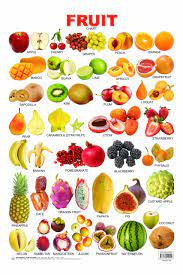
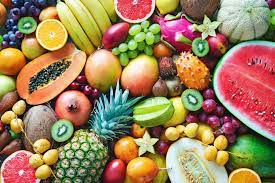
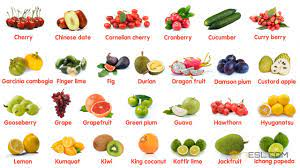
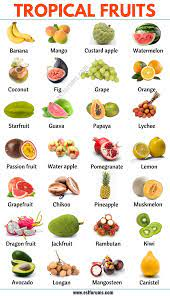
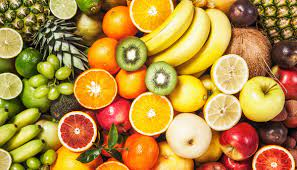
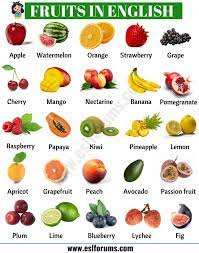
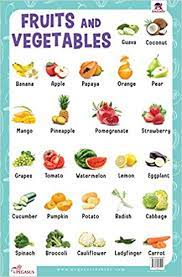
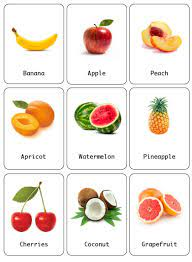
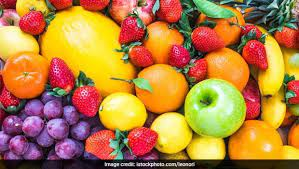
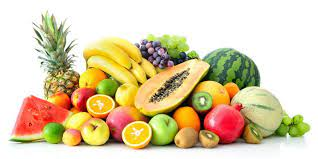
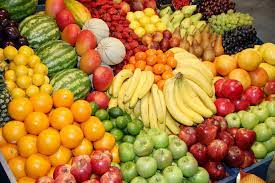
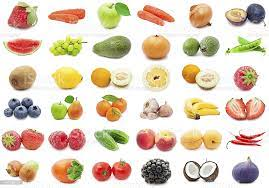
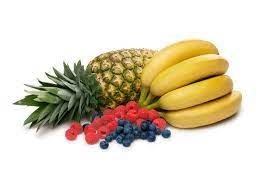
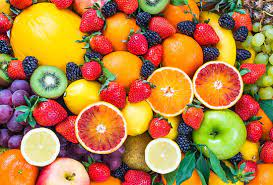
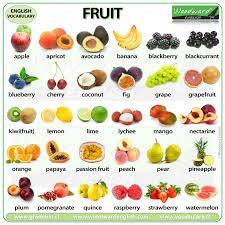
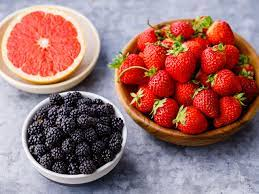
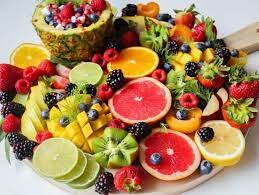
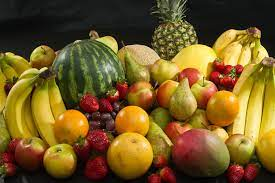
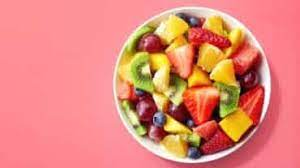
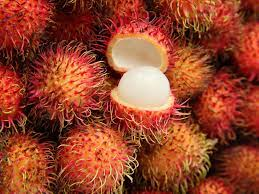

In [146]:
fruit_imgs=[]
for i in fruit_tags:
    fruit_imgs.append(i.get_attribute('src'))
fruit_imgs

**4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on 
www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped:** 
- “Brand Name”, 
- “Smartphone name”, 
- “Colour”, 
- “RAM”, 
- “Storage(ROM)”, 
- “Primary Camera”, 
- “Secondary Camera”, 
- “Display Size”, 
- “Display 
- Resolution”, 
- “Processor”, 
- “Processor Cores”, 
- “Battery Capacity”, 
- “Price”, 
- “Product URL”.<br> 
**Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe 
and CSV**

In [476]:
driver=webdriver.Edge(r'C:\Users\Mandar Shinde\Desktop\DataScience\DATA TRAINED\FlipRobo Internship\msedgedriver.exe')

In [477]:
##Getting the flipkart home page
url='https://www.flipkart.com/'
driver.get(url)

In [391]:
search_bar=driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
search_bar.send_keys('redmi note 10')

In [392]:
search_btn=driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button')
search_btn.click()

In [393]:
product_urls_tags=driver.find_elements_by_xpath('//div[@class="_2kHMtA"]//a')

product_urls=[]
for i in product_urls_tags:
    product_urls.append(i.get_attribute('href'))
product_urls

['https://www.flipkart.com/redmi-note-10-aqua-green-64-gb/p/itm1820ea99832a9?pid=MOBGF47C9VZTMQPM&lid=LSTMOBGF47C9VZTMQPMTCJ3TC&marketplace=FLIPKART&q=redmi+note+10&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=6bf5f082-f855-4033-9587-45c3e9bf6a33.MOBGF47C9VZTMQPM.SEARCH&ppt=hp&ppn=homepage&ssid=utxhognxkg0000001629733886876&qH=37347601431fd8b4',
 'https://www.flipkart.com/redmi-note-10-shadow-black-64-gb/p/itm8a3f09e6da31b?pid=MOBGF47C73G8HMZX&lid=LSTMOBGF47C73G8HMZXMV13G0&marketplace=FLIPKART&q=redmi+note+10&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=6bf5f082-f855-4033-9587-45c3e9bf6a33.MOBGF47C73G8HMZX.SEARCH&ppt=hp&ppn=homepage&ssid=utxhognxkg0000001629733886876&qH=37347601431fd8b4',
 'https://www.flipkart.com/redmi-note-10-aqua-green-128-gb/p/itm23973bd36fd21?pid=MOBGF47CCGXUZPAP&lid=LSTMOBGF47CCGXUZPAPZKY55Z&marketplace=FLIPKART&q=redmi+note+10&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=SEARCH&iid=6bf5

In [394]:
names=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        name_tag=driver.find_element_by_xpath('//h1[@class="yhB1nd"]//span')
        names.append(name_tag.text)
    except:
        names.append('---')
names

['REDMI Note 10 (Aqua Green, 64 GB)  (4 GB RAM)',
 'REDMI Note 10 (Shadow Black, 64 GB)  (4 GB RAM)',
 'REDMI Note 10 (Aqua Green, 128 GB)  (6 GB RAM)',
 'REDMI Note 10 (Frost White, 64 GB)  (4 GB RAM)',
 'REDMI Note 10 (Frost White, 128 GB)  (6 GB RAM)',
 'REDMI Note 10 (Shadow Black, 128 GB)  (6 GB RAM)',
 'REDMI Note 10 (Frost White, 128 GB)  (4 GB RAM)',
 'REDMI Note 10 (Shadow Black, 128 GB)  (4 GB RAM)',
 'REDMI Note 10 (Aqua Green, 64 GB)  (6 GB RAM)',
 'REDMI Note 10 (Shadow Black, 64 GB)  (6 GB RAM)',
 'REDMI Note 10 (Aqua Green, 128 GB)  (4 GB RAM)',
 'REDMI Note 10 (Frost White, 64 GB)  (6 GB RAM)',
 'REDMI Note 9 (Pebble Grey, 64 GB)  (4 GB RAM)',
 'REDMI Note 9 (Shadow Black, 64 GB)  (4 GB RAM)',
 'REDMI 9 Prime (Matte Black, 64 GB)  (4 GB RAM)',
 'REDMI Note 9 (Arctic White, 64 GB)  (4 GB RAM)',
 'REDMI Note 9 (Pebble Grey, 128 GB)  (4 GB RAM)',
 'REDMI Note 9 (Shadow Black, 128 GB)  (4 GB RAM)',
 'REDMI Note 9 (Arctic White, 128 GB)  (6 GB RAM)',
 'REDMI Note 10S (Frost 

In [395]:
len(names)

24

In [427]:
memory=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        memory_tag=driver.find_element_by_xpath('//li[@class="_21Ahn-"]')
        memory.append(memory_tag.text.rsplit('|'))
    except:
        memory.append('---')
        
memory

[['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['6 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['6 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['6 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['6 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['6 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['6 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 64 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB RAM ', ' 128 GB ROM ', ' Expandable Upto 512 GB'],
 ['4 GB

In [438]:
len(memory)

24

In [442]:
ram=[]
for i in memory:
    ram.append(i[0])
ram

['4 GB RAM ',
 '4 GB RAM ',
 '6 GB RAM ',
 '4 GB RAM ',
 '6 GB RAM ',
 '6 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '6 GB RAM ',
 '6 GB RAM ',
 '4 GB RAM ',
 '6 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '6 GB RAM ',
 '6 GB RAM ',
 '4 GB RAM ',
 '4 GB RAM ',
 '8 GB RAM ',
 '6 GB RAM ']

In [443]:
len(ram)

24

In [444]:
rom=[]
for i in memory:
    rom.append(i[1])
rom

[' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 128 GB ROM ',
 ' 64 GB ROM ',
 ' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 128 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 64 GB ROM ',
 ' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 64 GB ROM',
 ' 64 GB ROM',
 ' 128 GB ROM ',
 ' 128 GB ROM ',
 ' 64 GB ROM']

In [454]:
camera=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        camera_tag=driver.find_element_by_xpath('(//li[@class="_21Ahn-"])[3]')
        camera.append(camera_tag.text.rsplit('|'))
    except:
        camera.append('---')
camera[:3]

[['48MP + 8MP + 2MP + 2MP ', ' 13MP Front Camera'],
 ['48MP + 8MP + 2MP + 2MP ', ' 13MP Front Camera'],
 ['48MP + 8MP + 2MP + 2MP ', ' 13MP Front Camera']]

In [459]:
primary_camera=[]
secondary_camera=[]
for i in camera:
    primary_camera.append(i[0])
    secondary_camera.append(i[1])
print(len(primary_camera))
print(len(secondary_camera))

24
24


In [ ]:
class="URwL2w col col-9-12"

In [472]:
display=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        display_tag=driver.find_element_by_xpath('(//li[@class="_21Ahn-"])[2]')
        display.append(display_tag.text)
    except:
        display.append('---')
display[:2]

['16.33 cm (6.43 inch) Full HD+ Display',
 '16.33 cm (6.43 inch) Full HD+ Display']

In [478]:
battery=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        battery_tag=driver.find_element_by_xpath('(//li[@class="_21Ahn-"])[4]')
        battery.append(battery_tag.text)
    except:
        battery.append('---')
battery[:2]

['5000 mAh Li-Polymer Battery', '5000 mAh Li-Polymer Battery']

In [479]:
processor=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        processor_tag=driver.find_element_by_xpath('(//li[@class="_21Ahn-"])[5]')
        processor.append(processor_tag.text)
    except:
        processor.append('---')
processor[:2]

['Qualcomm Snapdragon 678 Processor', 'Qualcomm Snapdragon 678 Processor']

In [481]:

price=[]
for i in product_urls:
    driver.get(i)
    time.sleep(1)
    try:
        price_tag=driver.find_element_by_xpath('//div[@class="_30jeq3 _16Jk6d"]')
        price.append(price_tag.text)
    except:
        price.append('---')
price[:2]

['₹13,716', '₹14,985']

In [483]:
redmi_note10=pd.DataFrame()

redmi_note10['Smartphone Name']=name
redmi_note10['RAM']=ram
redmi_note10['ROM']=rom
redmi_note10['Display']=display
redmi_note10['Processor']=processor
redmi_note10['Battery']=battery
redmi_note10['Primary Camera']=primary_camera
redmi_note10['Secondary Camera']=secondary_camera
redmi_note10['Price']=price
redmi_note10['URL']=product_urls

redmi_note10.head()

,Smartphone Name,RAM,ROM,Display,Processor,Battery,Primary Camera,Secondary Camera,Price,URL
0,NaN,4 GB RAM,64 GB ROM,16.33 cm (6.43 inch) Full HD+ Display,Qualcomm Snapdragon 678 Processor,5000 mAh Li-Polymer Battery,48MP + 8MP + 2MP + 2MP,13MP Front Camera,"₹13,716",https://www.flipkart.com/redmi-note-10-aqua-gr...
1,NaN,4 GB RAM,64 GB ROM,16.33 cm (6.43 inch) Full HD+ Display,Qualcomm Snapdragon 678 Processor,5000 mAh Li-Polymer Battery,48MP + 8MP + 2MP + 2MP,13MP Front Camera,"₹14,985",https://www.flipkart.com/redmi-note-10-shadow-...
2,NaN,6 GB RAM,128 GB ROM,16.33 cm (6.43 inch) Full HD+ Display,Qualcomm Snapdragon 678 Processor,5000 mAh Li-Polymer Battery,48MP + 8MP + 2MP + 2MP,13MP Front Camera,"₹17,648",https://www.flipkart.com/redmi-note-10-aqua-gr...
3,NaN,4 GB RAM,64 GB ROM,16.33 cm (6.43 inch) Full HD+ Display,Qualcomm Snapdragon 678 Processor,5000 mAh Li-Polymer Battery,48MP + 8MP + 2MP + 2MP,13MP Front Camera,"₹15,490",https://www.flipkart.com/redmi-note-10-frost-w...
4,NaN,6 GB RAM,128 GB ROM,16.33 cm (6.43 inch) Full HD+ Display,Qualcomm Snapdragon 678 Processor,5000 mAh Li-Polymer Battery,48MP + 8MP + 2MP + 2MP,13MP Front Camera,"₹15,230",https://www.flipkart.com/redmi-note-10-frost-w...


**Q5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on 
google maps**

In [172]:
driver=webdriver.Edge(r'C:\Users\Mandar Shinde\Desktop\DataScience\DATA TRAINED\FlipRobo Internship\msedgedriver.exe')

In [173]:
##Getting the gmaps home page
url='https://www.google.com/maps'
driver.get(url)

In [177]:
driver.find_element_by_xpath('/html/body/jsl/div[3]/div[10]/div[3]/div[1]/div[1]/div[1]/div[2]/form/div/div[3]/div/input[1]').send_keys('Mumbai')

In [180]:
driver.find_element_by_xpath('/html/body/jsl/div[3]/div[10]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/button').click()

**Q6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 –
September 20) from trak.in.**

In [181]:
driver=webdriver.Edge(r'C:\Users\Mandar Shinde\Desktop\DataScience\DATA TRAINED\FlipRobo Internship\msedgedriver.exe')

In [182]:
##Getting the track.in home page
url='https://trak.in/india-startup-funding-investment-2015/'
driver.get(url)

In [186]:
a=driver.find_elements_by_xpath('//tbody[@class="row-hover"]//td')

a_list=[]
for i in a:
    a_list.append(i.text)
a_list

['1',
 '01/04/2021',
 'BYJU’S',
 'Edu-tech',
 'Online tutoring',
 'Bengaluru',
 'Innoven Capital',
 'Series F',
 '460,000,000',
 '2',
 '05/04/2021',
 'Meesho',
 'E-commerce',
 'Online reselling platform',
 'Bengaluru',
 'SoftBank Vision Fund 2',
 'Series E',
 '300,000,000',
 '3',
 '14/04/2021',
 'Swiggy',
 'Online Food Delivery',
 'Online Food Delivery',
 'Bengaluru',
 'Amansa Holdings, Carmignac, Falcon Edge Capital, Goldman Sachs, Think Investments',
 'Series J',
 '343,000,000',
 '4',
 '07/04/2021',
 'Groww',
 'FinTech',
 'Investment platform',
 'Bengaluru',
 'MC Global Edtech, B Capital, Baron, others',
 'Series D',
 '83,000,000',
 '5',
 '14/04/2021',
 'Beldara',
 'E-commerce',
 'Global B2B marketplace',
 'Mumbai',
 'Hindustan Media Ventures',
 'Venture',
 '7,400,000',
 '1',
 '04/03/2021',
 'DealShare',
 'E-commerce',
 'Online shopping platform',
 'Jaipur, Rajasthan',
 'Innoven Capital',
 'Debt Financing',
 '250,000,000',
 '2',
 '31/03/2021',
 'Uniphore',
 'Technology',
 'Conversati

In [218]:
dates=[]
for i in range(1,len(a_list),9):
    dates.append(a_list[i])
dates[55:85]

['08/09/2020',
 '12/09/2020',
 '09/09/2020',
 '02/09/2020',
 '09/09/2020',
 '07/09/2020',
 '07/09/2020',
 '31/08/2020',
 '31/08/2020',
 '03/09/2020',
 '15/08/2020',
 '13/08/2020',
 '13/08/2020',
 '04/08/2020',
 '11/08/2020',
 '12/08/2020',
 '14/08/2020',
 '10/08/2020',
 '07/08/2020',
 '13/08/2020',
 '15/07/2020',
 '16/07/2020',
 '16/07/2020',
 '14/07/2020',
 '13/07/2020',
 '09/07/2020',
 '10/07/2020',
 '15/07/2020',
 '14/07/2020',
 '13/07/2020']

In [207]:
names=[]
for i in range(2,len(a_list),9):
    names.append(a_list[i])
names[55:85]

['Byju’s',
 'mCaffeine',
 'Qshala',
 'Winzo',
 'Hippo Video',
 'Melorra',
 '1mg',
 'mfine',
 'Apna',
 'Railofy',
 'Practo',
 'Medlife',
 'HungerBox',
 'Dunzo',
 'Terra.do',
 'Classplus',
 'Niyo',
 'ZestMoney',
 'FreshToHome',
 'Eduvanz',
 'Flipkart',
 'Vedantu',
 'Crio',
 'goDutch',
 'Mystifly',
 'JetSynthesys',
 'gigIndia',
 'PumPumPum',
 'FLYX',
 'Open Appliances Pvt. Ltd.']

In [209]:
indus=[]
for i in range(3,len(a_list),9):
    indus.append(a_list[i])
indus[55:85]

['EduTech',
 'Personal Care',
 'EduTech',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'E-commerce',
 'E-commerce',
 'HealthTech',
 'Human Resources',
 'Transportation',
 'HealthTech',
 'E-commerce',
 'FoodTech',
 'Hyper-local Logistics',
 'EduTech',
 'EduTech',
 'FinTech',
 'FinTech',
 'E-commerce',
 'FinTech',
 'E-commerce',
 'EduTech',
 'EduTech',
 'FinTech',
 'Airfare Marketplace',
 'Gaming and Entertainment',
 'Marketplace',
 'Automotive Rental',
 'OTT Player',
 'Information Technology']

In [210]:
sub_vert=[]
for i in range(4,len(a_list),9):
    sub_vert.append(a_list[i])
sub_vert[55:85]

['Online Tutoring',
 'Skincare & Haircare',
 'Online Curiosity Platform for Kids',
 'Online Gaming',
 'Video Customer Experience(CX) Platform',
 'Online Jewelry Store',
 'Online Pharmacy',
 'On-Demand Healthcare Services',
 'Recruitment Platform',
 'WL & RAC protection platform',
 'Health care and Wellness',
 'Online Pharmacy',
 'Online Food Delivery Service',
 'Online Delivery Services',
 'Online Climate School, E-learning',
 'E-learning, Online Tutoring',
 'Financial Services',
 'Financial Services',
 'Food Delivery',
 'Financial Services',
 'E-commerce',
 'Online Tutoring',
 'Learning Platform for Developers',
 'Group Payments',
 'Ticketing, Airline Retailing, and Post-Ticketing Services',
 'Gaming and Entertainment',
 'Crowd Sourcing, Freelance',
 'Used Car-leasing platform',
 'Streaming Social Network',
 'Internet-of-Things Security Solutions']

In [214]:
city=[]
for i in range(5,len(a_list),9):
    city.append(a_list[i])
city[55:85]

['Bangalore',
 'Mumbai',
 'Bangalore',
 'New Delhi',
 'Newark, Delaware, United States of Amercia',
 'Bangalore',
 'Gurgaon',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Stanford, California,',
 'Noida',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Singapore and Bangalore',
 'Pune',
 'Pune',
 'Gurgaon',
 'New York and Delhi',
 'Bangalore']

In [213]:

investor=[]
for i in range(6,len(a_list),9):
    investor.append(a_list[i])
investor[55:85]

['Silver Lake, Tiger Global, General Atlantic and Owl Ventures',
 'Amicus Capital Private Equity I LLP, Amicus Capital Partners India Fund I and RP-SG Venture Fund 1',
 'Rainmatter Capital',
 'Kalaari Capital Partners, IndigoEdge Management Consultancy',
 'Alpha Wave Incubation, Exfinity Venture Partners and existing backers.',
 'Shadow Holdings, Lightbox.',
 'Gaja Capital, Tata Capital, Partners Group',
 'Caretech Pte Inc',
 'Lightspeed India and Sequoia Capital India',
 'Chiratae Ventures',
 'A1A Company',
 'Prasid Uno Family Trust and SC Credit Fund',
 'One97, Sabre Partners Trust, Pratithi Investment Trust, and Srihari Kumar',
 'Existing Backers',
 'Stanford Angels and Entrepreneurs (India), BEENEXT Emerging Asia, Rainmatter Capital',
 'Falcon Edge',
 'Niyo Solutions Inc.',
 'Primrose Hills Ventures',
 'Ascent Capital',
 'Sequoia India, Unitus',
 'Walmart Inc',
 'Coatue Management',
 '021 Capital',
 'Matrix India,Y Combinator, Global Founders Capital, Soma Capital, and VentureSouq.

In [215]:
inv_type=[]
for i in range(7,len(a_list),9):
    inv_type.append(a_list[i])
inv_type[55:85]

['Private Equity',
 'Series B',
 'Angel',
 'Series B',
 'Series A',
 'Debt Financing',
 'In Progress',
 'Series B',
 'Series A',
 'Seed',
 'Series F',
 '',
 'Series D1',
 'In Progress',
 'Seed',
 'In Progress',
 '',
 '',
 'Venture',
 'Series A',
 'M&A',
 'Series D',
 'pre-Series A',
 'Seed',
 'pre-Series B',
 'Venture-Series Unknown',
 'pre-Series A',
 'Seed',
 'pre-Seed',
 'Venture-Series Unknown']

In [216]:
amount=[]
for i in range(8,len(a_list),9):
    amount.append(a_list[i])
amount[55:85]

['500,000,000',
 '3,000,000',
 '370,000',
 '15,500,000',
 '4,500,000',
 'upto 8,900,000',
 '100,000,000',
 '5,400,000',
 '8,000,000',
 '950,000',
 '32,000,000',
 '23,000,000',
 '1,560,000',
 '30,000,000',
 '1,400,000',
 'upto 15,000,000',
 '6,000,000',
 '10,670,000',
 '16,200,000',
 '5,000,000',
 '1,200,000,000',
 '100,000,000',
 '934,160',
 '1,700,000',
 '3,300,000',
 '400,000',
 '974,200',
 '292,800',
 '200,000',
 '500,000']

In [221]:
Funding_Q3_2020=pd.DataFrame()

Funding_Q3_2020['Date']=dates[55:85]
Funding_Q3_2020['Startup Name']=names[55:85]
Funding_Q3_2020['Industry/Vertical']=indus[55:85]
Funding_Q3_2020['Sub Vertical']=sub_vert[55:85]
Funding_Q3_2020['City/Location']=city[55:85]
Funding_Q3_2020["Investor's Name"]=investor[55:85]
Funding_Q3_2020['Investment Type']=inv_type[55:85]
Funding_Q3_2020['Amount (USD)']=amount[55:85]

Funding_Q3_2020

,Date,Startup Name,Industry/Vertical,Sub Vertical,City/Location,Investor's Name,Investment Type,Amount (USD)
0,08/09/2020,Byju’s,EduTech,Online Tutoring,Bangalore,"Silver Lake, Tiger Global, General Atlantic an...",Private Equity,"500,000,000"
1,12/09/2020,mCaffeine,Personal Care,Skincare & Haircare,Mumbai,"Amicus Capital Private Equity I LLP, Amicus Ca...",Series B,"3,000,000"
2,09/09/2020,Qshala,EduTech,Online Curiosity Platform for Kids,Bangalore,Rainmatter Capital,Angel,"370,000"
3,02/09/2020,Winzo,Online Gaming,Online Gaming,New Delhi,"Kalaari Capital Partners, IndigoEdge Managemen...",Series B,"15,500,000"
4,09/09/2020,Hippo Video,Video Customer Experience(CX) Platform,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia","Alpha Wave Incubation, Exfinity Venture Partne...",Series A,"4,500,000"
5,07/09/2020,Melorra,E-commerce,Online Jewelry Store,Bangalore,"Shadow Holdings, Lightbox.",Debt Financing,"upto 8,900,000"
6,07/09/2020,1mg,E-commerce,Online Pharmacy,Gurgaon,"Gaja Capital, Tata Capital, Partners Group",In Progress,"100,000,000"
7,31/08/2020,mfine,HealthTech,On-Demand Healthcare Services,Bangalore,Caretech Pte Inc,Series B,"5,400,000"
8,31/08/2020,Apna,Human Resources,Recruitment Platform,Bangalore,Lightspeed India and Sequoia Capital India,Series A,"8,000,000"
9,03/09/2020,Railofy,Transportation,WL & RAC protection platform,Mumbai,Chiratae Ventures,Seed,"950,000"


**7. Write a program to scrap all the available details of best gaming laptops from digit.in.**


In [254]:
driver=webdriver.Edge(r'C:\Users\Mandar Shinde\Desktop\DataScience\DATA TRAINED\FlipRobo Internship\msedgedriver.exe')

In [255]:
##Getting the digit.in home page
url='https://www.digit.in/'
driver.get(url)

In [256]:
driver.find_element_by_xpath('/html/body/div[1]/div/div[4]/ul/li[3]/a').click()

In [257]:
driver.find_element_by_xpath('/html/body/div[6]/div/div[2]/div[2]/ul/li[10]/a').click()

In [258]:
header_tags=driver.find_elements_by_xpath('//div[@class="right-container"]//h3')

In [259]:
Name=[]

for i in header_tags:
    Name.append(i.text)
Name

['ALIENWARE AREA 51M R2',
 'ALIENWARE M15 R3',
 'ASUS ROG STRIX SCAR 15',
 'ASUS ROG ZEPHYRUS G14',
 'LENOVO LEGION 5I',
 'ASUS ROG ZEPHYRUS DUO 15',
 'ACER ASPIRE 7 GAMING']

In [264]:
spec_tags=driver.find_elements_by_xpath('//div[@class="value"]')

In [265]:
specs=[]
for i in os_tags:
    specs.append(i.text)
specs

['WINDOWS 10 HOME',
 '17.3" (1920 X 1080)',
 '10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (3840 X 2160)',
 '10TH GENERATION INTEL® CORE™ I9-10980HK | NA',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 'AMD RYZEN™ 9 5900HX | 3.3 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 HOME',
 '14" (1920 X 1080)',
 'AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10 PRO',
 '15.6" (1920 X 1080)',
 '10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ',
 '1 TB SSD/16 GBGB DDR4',
 'WINDOWS 10',
 '15.6" (3840 X 1100)',
 'INTEL CORE I7 10TH GEN 10875H | NA',
 '512 GB SSD/4 GBGB DDR4',
 'WINDOWS 10 HOME',
 '15.6" (1920 X 1080)',
 'AMD RYZEN™ 5-5500U HEXA-CORE | NA',
 '512 GB SSD/8 GBGB DDR4']

In [267]:
os=[]
for i in range(0,len(specs),4):
    os.append(specs[i])
os

['WINDOWS 10 HOME',
 'WINDOWS 10 HOME',
 'WINDOWS 10 HOME',
 'WINDOWS 10 HOME',
 'WINDOWS 10 PRO',
 'WINDOWS 10',
 'WINDOWS 10 HOME']

In [270]:
display=[]
for i in range(1,len(specs),4):
    display.append(specs[i])
display

['17.3" (1920 X 1080)',
 '15.6" (3840 X 2160)',
 '15.6" (1920 X 1080)',
 '14" (1920 X 1080)',
 '15.6" (1920 X 1080)',
 '15.6" (3840 X 1100)',
 '15.6" (1920 X 1080)']

In [271]:
processor=[]
for i in range(2,len(specs),4):
    processor.append(specs[i])
processor

['10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ',
 '10TH GENERATION INTEL® CORE™ I9-10980HK | NA',
 'AMD RYZEN™ 9 5900HX | 3.3 GHZ',
 'AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ',
 '10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ',
 'INTEL CORE I7 10TH GEN 10875H | NA',
 'AMD RYZEN™ 5-5500U HEXA-CORE | NA']

In [272]:
memory=[]
for i in range(3,len(specs),4):
    memory.append(specs[i])
memory

['1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '1 TB SSD/16 GBGB DDR4',
 '512 GB SSD/4 GBGB DDR4',
 '512 GB SSD/8 GBGB DDR4']

In [275]:
top_gaming_laptops=pd.DataFrame()

top_gaming_laptops['Name']=Name
top_gaming_laptops['OS']=os
top_gaming_laptops['Processor']=processor
top_gaming_laptops['Memory']=memory
top_gaming_laptops['Display']=display

top_gaming_laptops

,Name,OS,Processor,Memory,Display
0,ALIENWARE AREA 51M R2,WINDOWS 10 HOME,10TH GENERATION INTEL® CORE™ I7-10700 | 2.90 GHZ,1 TB SSD/16 GBGB DDR4,"17.3"" (1920 X 1080)"
1,ALIENWARE M15 R3,WINDOWS 10 HOME,10TH GENERATION INTEL® CORE™ I9-10980HK | NA,1 TB SSD/16 GBGB DDR4,"15.6"" (3840 X 2160)"
2,ASUS ROG STRIX SCAR 15,WINDOWS 10 HOME,AMD RYZEN™ 9 5900HX | 3.3 GHZ,1 TB SSD/16 GBGB DDR4,"15.6"" (1920 X 1080)"
3,ASUS ROG ZEPHYRUS G14,WINDOWS 10 HOME,AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ,1 TB SSD/16 GBGB DDR4,"14"" (1920 X 1080)"
4,LENOVO LEGION 5I,WINDOWS 10 PRO,10TH GENERATION INTEL® CORE™ I5-10300H | 2.50 GHZ,1 TB SSD/16 GBGB DDR4,"15.6"" (1920 X 1080)"
5,ASUS ROG ZEPHYRUS DUO 15,WINDOWS 10,INTEL CORE I7 10TH GEN 10875H | NA,512 GB SSD/4 GBGB DDR4,"15.6"" (3840 X 1100)"
6,ACER ASPIRE 7 GAMING,WINDOWS 10 HOME,AMD RYZEN™ 5-5500U HEXA-CORE | NA,512 GB SSD/8 GBGB DDR4,"15.6"" (1920 X 1080)"


**8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.**


In [290]:
driver=webdriver.Edge(r'C:\Users\Mandar Shinde\Desktop\DataScience\DATA TRAINED\FlipRobo Internship\msedgedriver.exe')

In [291]:
##Getting the forbes.com home page
url='https://www.forbes.com/billionaires/'
driver.get(url)

In [281]:
rank_tags=driver.find_elements_by_xpath('//div[@class="rank"]')

rank=[]

for i in rank_tags:
    rank.append(i.text)
len(rank)

200

In [284]:
name_tags=driver.find_elements_by_xpath('//div[@class="personName"]')

person_name=[]

for i in name_tags:
    person_name.append(i.text)
person_name[:5]

['Jeff Bezos',
 'Elon Musk',
 'Bernard Arnault & family',
 'Bill Gates',
 'Mark Zuckerberg']

In [285]:
nw_tags=driver.find_elements_by_xpath('//div[@class="netWorth"]')

net_worth=[]

for i in nw_tags:
    net_worth.append(i.text)
net_worth[:5]

['$177 B', '$151 B', '$150 B', '$124 B', '$97 B']

In [294]:
age_tags=driver.find_elements_by_xpath('//div[@class="age"]//div')

age=[]

for i in age_tags:
    age.append(i.text)
age[:10]

['57', '49', '72', '65', '36', '90', '76', '48', '47', '63']

In [293]:
country_tags=driver.find_elements_by_xpath('//div[@class="countryOfCitizenship"]')

country=[]

for i in country_tags:
    country.append(i.text)
country[:5]

['United States', 'United States', 'France', 'United States', 'United States']

In [295]:
source_tags=driver.find_elements_by_xpath('//div[@class="source"]')

source=[]

for i in source_tags:
    source.append(i.text)
source[:5]

['Amazon', 'Tesla, SpaceX', 'LVMH', 'Microsoft', 'Facebook']

In [298]:
industry_tags=driver.find_elements_by_xpath('//div[@class="category"]')

industry=[]

for i in industry_tags:
    industry.append(i.text)
industry[:5]

['Technology', 'Automotive', 'Fashion & Retail', 'Technology', 'Technology']

In [299]:
Billionaires=pd.DataFrame()

Billionaires['Rank']=rank
Billionaires['Name']=person_name
Billionaires['Net Worth']=net_worth
Billionaires['Age']=age
Billionaires['Country']=country
Billionaires['Source']=source
Billionaires['Industry']=industry

Billionaires.head(20)

,Rank,Name,Net Worth,Age,Country,Source,Industry
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
5,6.,Warren Buffett,$96 B,90,United States,Berkshire Hathaway,Finance & Investments
6,7.,Larry Ellison,$93 B,76,United States,software,Technology
7,8.,Larry Page,$91.5 B,48,United States,Google,Technology
8,9.,Sergey Brin,$89 B,47,United States,Google,Technology
9,10.,Mukesh Ambani,$84.5 B,63,India,diversified,Diversified


**Q9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.**


In [484]:
driver=webdriver.Edge(r'C:\Users\Mandar Shinde\Desktop\DataScience\DATA TRAINED\FlipRobo Internship\msedgedriver.exe')

In [338]:
from selenium.webdriver.common.keys import Keys

In [485]:
##Getting the forbes.com home page
url='https://www.youtube.com/watch?v=5Z9OIYA8He8'
driver.get(url)

In [487]:
comment_tags=driver.find_elements_by_xpath('//yt-formatted-string[@id="content-text"]')

comments=[]

for i in comment_tags:
    comments.append(i.text)
len(comments)

275

In [488]:
upvote_tags=driver.find_elements_by_xpath('//span[@id="vote-count-middle"]')

upvotes=[]

for i in upvote_tags:
    try:
        upvotes.append(i.text)
    except:
        upvotes.append('---')
len(upvotes)

275

In [489]:
upvotes[:5]

['34', '1', '', '1', '1']

In [491]:
ago_tags=driver.find_elements_by_xpath('//yt-formatted-string[@class="published-time-text above-comment style-scope ytd-comment-renderer"]//a')

ago=[]

for i in ago_tags:
    try:
        ago.append(i.text)
    except:
        ago.append('---')
ago[:5]

['1 year ago', '4 days ago', '2 weeks ago', '3 weeks ago', '1 month ago']

In [494]:
youtube_comments=pd.DataFrame()

youtube_comments['Comment']=comments
youtube_comments['Upvotes']=upvotes
youtube_comments['Time']=ago

youtube_comments.head(10)

,Comment,Upvotes,Time
0,"NOTE: This StatQuest has been updated, so chec...",34,1 year ago
1,tnx a lot,1,4 days ago
2,"but, whats the point of having P value??",,2 weeks ago
3,"""one five somethin somethin somethin""\nthis is...",1,3 weeks ago
4,You're truly awesome <3,1,1 month ago
5,Lectures are boring!!!...bummer...But Lectures...,1,1 month ago
6,"sorry, at 14:30 tricky example, why do we add...",,1 month ago
7,"A question: in the last example, the P-value o...",,2 months ago
8,I understand the mere examples but can’t relat...,,2 months ago
9,Understood what is p-value but why should we c...,,2 months ago


**10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.**

In [342]:
driver=webdriver.Edge(r'C:\Users\Mandar Shinde\Desktop\DataScience\DATA TRAINED\FlipRobo Internship\msedgedriver.exe')

In [343]:
##Getting the forbes.com home page
url='https://www.hostelworld.com/'
driver.get(url)

In [344]:
driver.find_element_by_xpath('/html/body/div[1]/div/div/div[1]/div[1]/div/div[2]/div[4]/div/div[2]/div/div[1]/div/div/div/input').send_keys('London')

In [346]:
driver.find_element_by_xpath('/html/body/div[1]/div/div/div[1]/div[1]/div/div[2]/div[4]/div/div[2]/div/div[5]/button').click()

In [355]:
names=[]

name_tags=driver.find_elements_by_xpath('//h2[@class="title title-6"]//a')
for i in name_tags:
    names.append(i.text)
names

['Saint James Backpackers',
 'Clink261',
 'International Students House',
 'Smart Hyde Park Inn Hostel',
 'Astor Victoria',
 'Pickwick Hall',
 'Jaeger Acton Hostel',
 'Abercorn House',
 'Strand Continental',
 'The Backpackshack',
 'Best London Hostels',
 'Atlas Hostels',
 'The London Home Hostel',
 'Le Junction Hostel - Pub & Garden',
 'No.8 Seven Sisters',
 'Safestay London Kensington Holland Park',
 'Park Villa',
 'Selina Camden',
 'The Dictionary Hostel',
 'PubLove @ The Rose & Crown',
 'Venture Hostel',
 'PubLove @ The Exmouth Arms, Euston',
 'Kensal Green Backpackers',
 'London Backpackers',
 'Budget London Apartments',
 'Belgrave Hotel London',
 'Colliers Hotel',
 'Marble Arch Inn',
 'City Hotel Carlton',
 'Hyde Park Court Hotel']

In [356]:
len(names)

30

In [359]:
dist=[]

dist_tags=driver.find_elements_by_xpath('//div[@class="subtitle body-3"]//span')
for i in dist_tags:
    dist.append(i.text)
dist

['Hostel - 5.5km from city centre',
 'Show on Map',
 'Hostel - 3.2km from city centre',
 'Show on Map',
 'Hostel - 3.3km from city centre',
 'Show on Map',
 'Hostel - 5km from city centre',
 'Show on Map',
 'Hostel - 1.8km from city centre',
 'Show on Map',
 'Hostel - 2.3km from city centre',
 'Show on Map',
 'Hostel - 10.4km from city centre',
 'Show on Map',
 'Hostel - 7.3km from city centre',
 'Show on Map',
 'Hostel - 1.3km from city centre',
 'Show on Map',
 'Hostel - 10.9km from city centre',
 'Show on Map',
 'Hostel - 8.2km from city centre',
 'Show on Map',
 'Hostel - 4.3km from city centre',
 'Show on Map',
 'Hostel - 3.6km from city centre',
 'Show on Map',
 'Hostel - 9.8km from city centre',
 'Show on Map',
 'Hostel - 9km from city centre',
 'Show on Map',
 'Hostel - 5.9km from city centre',
 'Show on Map',
 'Hostel - 6.3km from city centre',
 'Show on Map',
 'Hostel - 5.5km from city centre',
 'Show on Map',
 'Hostel - 4.1km from city centre',
 'Show on Map',
 'Hostel - 1.6

In [362]:
hostel_dist=[]
for i in range(0,len(dist),2):
    hostel_dist.append(dist[i])
hostel_dist

['Hostel - 5.5km from city centre',
 'Hostel - 3.2km from city centre',
 'Hostel - 3.3km from city centre',
 'Hostel - 5km from city centre',
 'Hostel - 1.8km from city centre',
 'Hostel - 2.3km from city centre',
 'Hostel - 10.4km from city centre',
 'Hostel - 7.3km from city centre',
 'Hostel - 1.3km from city centre',
 'Hostel - 10.9km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 4.3km from city centre',
 'Hostel - 3.6km from city centre',
 'Hostel - 9.8km from city centre',
 'Hostel - 9km from city centre',
 'Hostel - 5.9km from city centre',
 'Hostel - 6.3km from city centre',
 'Hostel - 5.5km from city centre',
 'Hostel - 4.1km from city centre',
 'Hostel - 1.6km from city centre',
 'Hostel - 6.9km from city centre',
 'Hostel - 3.4km from city centre',
 'Hostel - 8.2km from city centre',
 'Hostel - 11.9km from city centre',
 'Apartment - 8.2km from city centre',
 'Hotel - 2.2km from city centre',
 'Hotel - 2.1km from city centre',
 'Hotel - 3.5km from city ce

In [363]:
len(hostel_dist)

30

ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [364]:
rating=[]

rating_tags=driver.find_elements_by_xpath('//div[@class="score orange big"]')
for i in rating_tags:
    rating.append(i.text)
rating

['7.5',
 '7.6',
 '8.9',
 '7.4',
 '9.6',
 '9.1',
 '8.8',
 '7.0',
 '8.3',
 '9.0',
 '6.7',
 '7.7',
 '6.6',
 '7.6',
 '8.4',
 '9.0',
 '9.1',
 '7.4',
 '7.5',
 '6.8',
 '8.6',
 '6.2',
 '9.4',
 '7.7',
 '8.4',
 '6.7']

In [365]:
len(rating)

26

In [386]:
rating_info=[]

rating_tags=driver.find_elements_by_xpath('//div[@class="info"]//div')
for i in rating_tags:
    try:
        rating_info.append(i.text)
    except:
        rating_info.append('---')
rating_info

['Perfect Location\nMarvellous Staff\nExcellent Cleanliness',
 'Perfect Location',
 'Marvellous Staff',
 'Excellent Cleanliness',
 '7.5\nVery Good\n1759 Total Reviews',
 '7.5',
 'Very Good\n1759 Total Reviews',
 'Very Good',
 '1759 Total Reviews',
 'Perfect Location\nSuperb Staff\nAwesome Cleanliness',
 'Perfect Location',
 'Superb Staff',
 'Awesome Cleanliness',
 '7.6\nVery Good\n3172 Total Reviews',
 '7.6',
 'Very Good\n3172 Total Reviews',
 'Very Good',
 '3172 Total Reviews',
 'Perfect Location\nSuperb Staff\nGood Cleanliness',
 'Perfect Location',
 'Superb Staff',
 'Good Cleanliness',
 '8.9\nFabulous\n918 Total Reviews',
 '8.9',
 'Fabulous\n918 Total Reviews',
 'Fabulous',
 '918 Total Reviews',
 'Perfect Location\nMarvellous Staff\nAwesome Cleanliness',
 'Perfect Location',
 'Marvellous Staff',
 'Awesome Cleanliness',
 '7.4\nVery Good\n6237 Total Reviews',
 '7.4',
 'Very Good\n6237 Total Reviews',
 'Very Good',
 '6237 Total Reviews',
 'Perfect Location\nSuperb Staff\nFantastic Clea

In [383]:
rating=[]

for i in range(0,len(rating_info),4):
    rating.append(rating_info[i])
rating

['7.5',
 '7.6',
 '8.9',
 '7.4',
 '9.6',
 '9.1',
 '8.8',
 '7.0',
 '8.3',
 '9.0',
 '6.7',
 '2.0',
 '7.7',
 '6.6',
 '7.6',
 '8.4',
 '9.0',
 '9.1',
 'NEW\n3 Total Reviews',
 'Very Good\n99 Total Reviews',
 'Rating\n1168 Total Reviews',
 'Very Good\n978 Total Reviews',
 'Good\n3601 Total Reviews',
 'Fabulous\n4116 Total Reviews',
 'Good\n355 Total Reviews',
 'Superb\n2 Total Reviews',
 'Very Good\n2 Total Reviews',
 'Fabulous\n214 Total Reviews',
 'Good\n38 Total Reviews',
 'No Rating']

In [384]:
len(rating)

30

In [387]:
priv_price=[]

pri_tags=driver.find_elements_by_xpath('//div[@class="price title-5"]')
for i in pri_tags:
    try:
        priv_price.append(i.text)
    except:
        priv_price.append('---')
priv_price

['Rs8232',
 'Rs1874',
 'Rs2129',
 'Rs1460',
 'Rs3852',
 'Rs1358',
 'Rs8612',
 'Rs1520',
 'Rs7683',
 'Rs1228',
 'Rs856',
 'Rs7095',
 'Rs1419',
 'Rs5473',
 'Rs1824',
 'Rs2398',
 'Rs1443',
 'Rs1723',
 'Rs3120',
 'Rs1213',
 'Rs4561',
 'Rs1637',
 'Rs1419',
 'Rs2220',
 'Rs1581',
 'Rs5169',
 'Rs4257',
 'Rs3178',
 'Rs10646',
 'Rs1520',
 'Rs2068',
 'Rs4332',
 'Rs1764',
 'Rs1520',
 'Rs1189',
 'Rs8007',
 'Rs1926',
 'Rs2027',
 'Rs1161',
 'Rs1520',
 'Rs4221']

In [388]:
len(priv_price)

41